In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

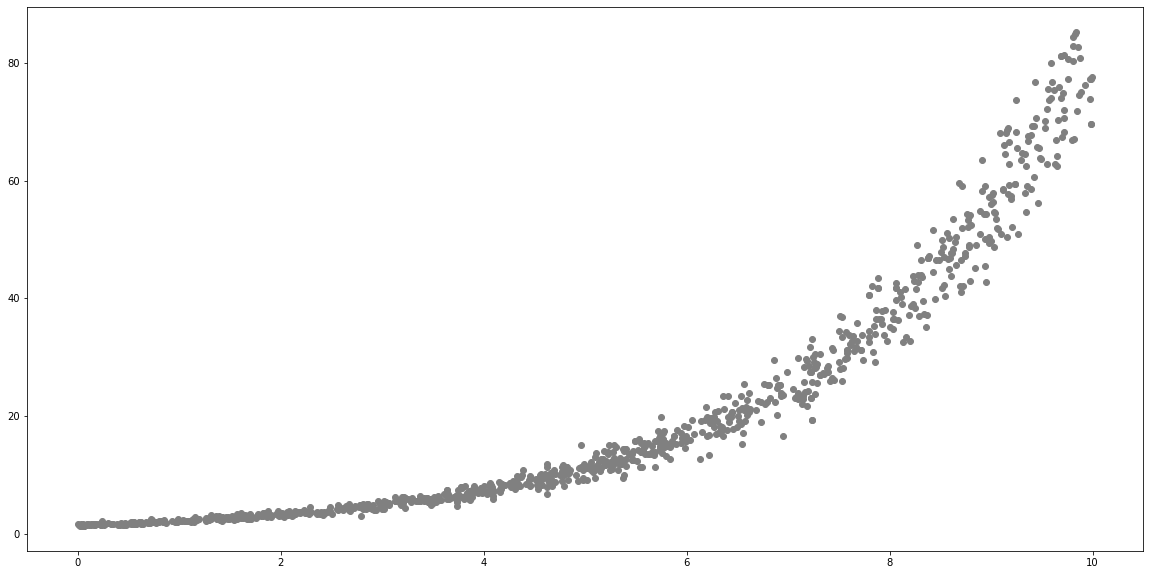

In [2]:
df = pd.read_csv("P1grupo_8.csv")

x, y = [x for x in df.x], [y for y in df.y] 

plt.figure(figsize=(20, 10))
plt.scatter(x, y, color = 'gray')
plt.show()

**a)**

$$ y = \alpha e^{\beta x}$$
$$ y = \alpha e^{\beta x}\; /ln()$$
$$ln(y) = ln(\alpha e^{\beta x})$$
$$ln(y) = ln(\alpha) + ln(e^{\beta x})$$
$$ln(y) = ln(\alpha) + \beta x$$

donde , transformando ln(y) a y* 


nos queda un problema de regresión lineal de la forma:


$$y* = ln(\alpha) + \beta x \; con\; \ ln(\alpha) , \beta \; \in \mathbb{R}$$

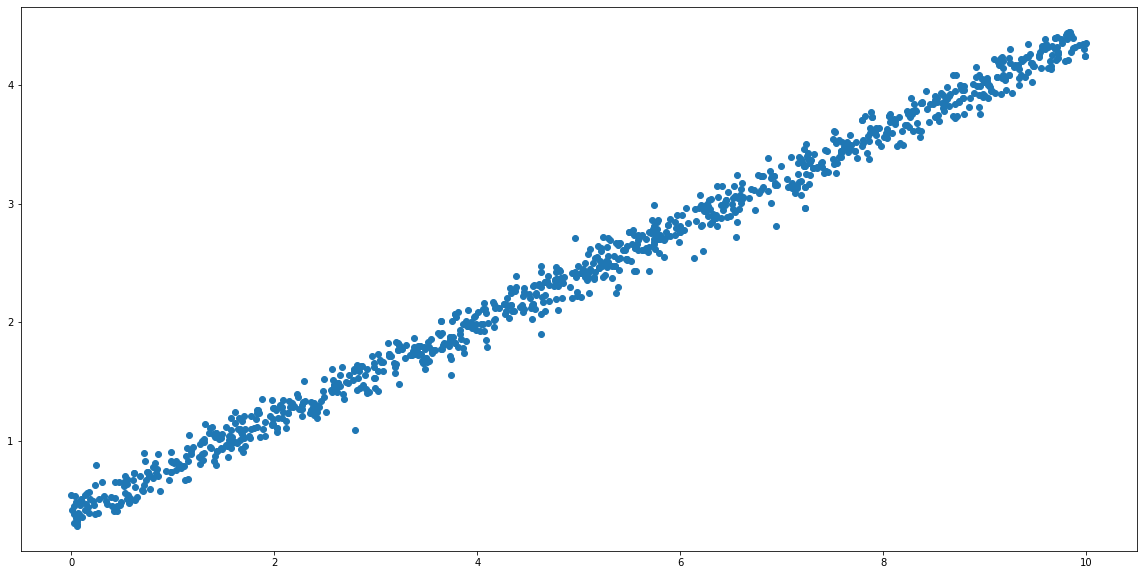

In [3]:
# Transformación de datos
df['log(y)'] = np.log(df.y)

x, y = [x for x in df.x], [y for y in df['log(y)']]

plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.show()

**b)**

**necesitamos obtener una recta de la forma $y = mx + b$**

**como sabemos, podemos ver la recta obtenida a partir de la regresión lineal, como:**

**$$y_{i} = mx_{i} + b + \epsilon_{i}$$**

**donde $\epsilon$ corresponde al error en en la i-ésima estimación.**

**de esta manera, nuestro problema se resume en minimizar lo más posible la suma cuadráda de estos errores (el cuadrado para evitar errores causados por el signo)**

**entonces, buscamos minimizar la función:**

**$$\Sigma_{i=1}^{n} \epsilon_{i}^{2}$$**

**donde n corresponde al total de datos $x_{i}$  (para este caso, 1000)**

**$$\Rightarrow \Sigma_{i=1}^{n} \epsilon_{i}^{2} = \Sigma_{i=1}^{1000} \epsilon_{i}^{2} = \Sigma_{i=1}^{1000} (y_{i} - mx_{i} - b)^{2}$$**

**de esta manera, definimos F(b,m) = $\Sigma_{i=1}^{1000} (y_{i} - mx_{i} - b)^{2}$ , función la cual queremos minimizar**

**para encontrar el punto b,m que minimiza F(b,m) usamos derivadas parciales igualándolas a 0:**

**$$\frac{\partial}{\partial m} F(b,m) = 0$$**         

**$$\frac{\partial}{\partial b} F(b,m) = 0$$**

**resolviendo:**

**$$\frac{\partial}{\partial m} F(b,m) = \frac{\partial}{\partial m} \sum_{i=1}^{1000} (y_{i}-mx_{i} - b)^{2}$$**

**$$= \sum_{i=1}^{1000}\frac{\partial}{\partial m}(y_{i} - mx_{i} - b)^{2} $$**

**$$= \sum_{i=1}^{1000}2(y_{i} - mx_{i} - b)(-x_{i})$$**

**$$=\sum_{i=1}^{1000}2(-y_{i}x_{i} + mx_{i}^{2} + bx_{i})$$** **donde igualando a 0:**

**$$\Leftrightarrow-\sum_{i=1}^{1000}2y_{i}x_{i} + 2m\sum_{i=1}^{1000}x_{i}^{2} + 2b\sum_{i=1}^{1000}x_{i} = 0$$**

**concluímos que:**

**$$ m\sum_{i=1}^{1000}x_{i}^{2} = \sum_{i=1}^{1000}y_{i}x_{i} - b\sum_{i=1}^{1000}x_{i}\;\;\;\;\;\;\;\; (1)$$**

**resolviendo ahora la derivada parcial con respecto a b:**

**$$\frac{\partial}{\partial b}F(b,m) = \sum_{i=1}^{1000}\frac{\partial}{\partial b}(y_{i}-mx_{i}-b)^{2}$$**

**$$=\sum_{i=1}^{1000}2(y_{i}-mx_{i}-b)(-1)$$**

**$$= \sum_{i=1}^{1000}-2y_{i}+2mx_{i}+2b$$**

**$$= -2\sum_{i=1}^{1000}y_{i} +  2m\sum_{i=1}^{1000}x_{i} + 2\sum_{i=1}^{1000}b$$**

**por lo tanto, el problema es equivalente a resolver la ecuación**

**$$-2\sum_{i=1}^{1000}y_{i} +  2m\sum_{i=1}^{1000}x_{i} + 2\sum_{i=1}^{1000}b = 0 $$**

**o bien:**

**$$\sum_{i=1}^{1000}y_{i} = m\sum_{i=1}^{1000}x_{i} + \sum_{i=1}^{1000}b\;\;\;\;\;\;\;\; (2)$$**

**resolviendo (1) y (2) como sistema lineal llegamos a:**

**$$ m = \frac{1000\sum_{i=1}^{1000}x_{i}y_{i} - \sum_{i=1}^{1000}x_{i}\sum_{i=1}^{1000}y_{i}}{1000\sum_{i=1}^{1000}x_{i}^{2}-(\sum_{i=1}^{1000}x_{i})^{2}} $$**



**$$b = \bar{y} - m \bar{x} $$**

In [4]:
# implementamos el cálculo

n = df.shape[0]
df_xy = 0
for num in range(n):
    df_xy += df['log(y)'][num]*df.x[num]
    
df_x_2 = 0
for num in range(n):
    df_x_2 += df.x[num]*df.x[num]


m = ((n*df_xy) - df.x.sum()*df['log(y)'].sum()) / (n*df_x_2 - df.x.sum()*df.x.sum())
b = df['log(y)'].mean() - m*df.x.mean()

print(f'El valor de m es: {m}')
print(f'El valor de b es: {b}')

El valor de m es: 0.401852986767651
El valor de b es: 0.392932143864166


**c)**

**por como está construida la regresión, es posible asumir las siguientes igualdades para encontrar los valores de $\alpha$ y $\beta$**

**$$\beta = m$$**

**$$ln(\alpha) = b \Rightarrow a = e^{b}$$**

In [5]:
alpha = math.e**(b)
beta = m

print(f'Alpha: {alpha}')
print(f'Beta: {beta}')

Alpha: 1.4813178694122962
Beta: 0.401852986767651


**d)**

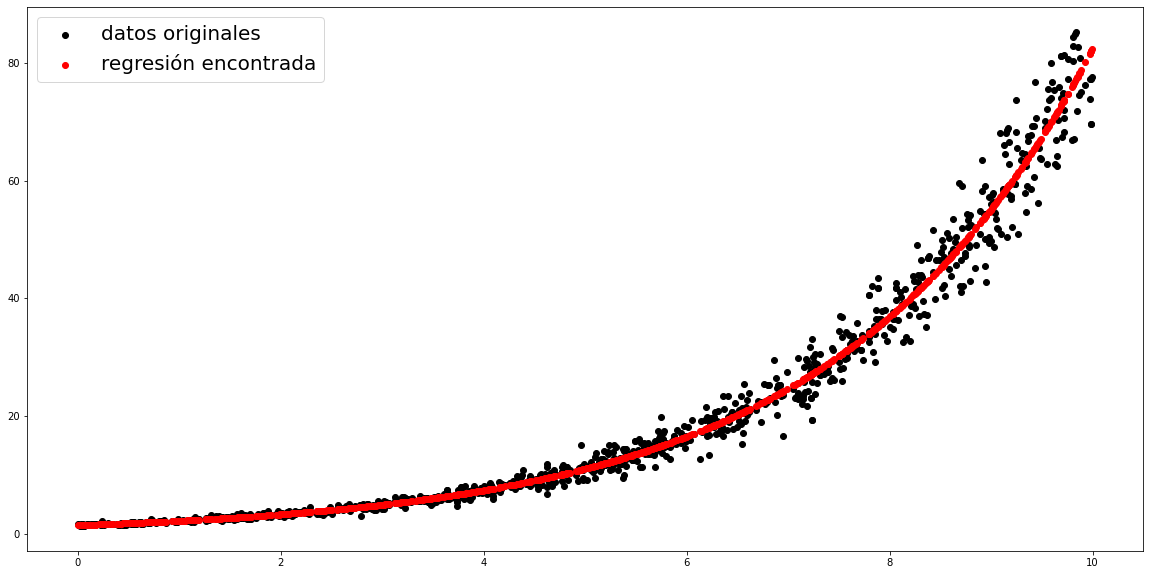

In [6]:
def expreg(n): return alpha*math.e**(beta*n)
y_reg = [expreg(n) for n in df.x]
y = [n for n in df.y]


plt.figure(figsize=(20, 10))
plt.scatter(x,y, color='black', label = 'datos originales')
plt.scatter(x, y_reg, color='red', label = 'regresión encontrada')
plt.legend(fontsize = 20, loc = 'upper left')
plt.show()

**Parte 2**

In [7]:
#Aquí cargamos el archivo y guardamos en tres listas
with open("P2grupo_8.csv", "r",encoding="utf-8") as file:
    us=[]
    vs=[]
    ws=[]
    for line in file.readlines():
        u,v,w=line.strip().split(",")
        us.append(float(u))
        vs.append(float(v))
        ws.append(float(w))

**a)** 

$$ \frac{d}{da} \tanh \left(a\right) = \frac{d}{da} \frac{\sinh\left(a\right)}{\cosh\left(a\right)}$$
$$  = \frac{\sinh\left(a\right)'\cosh\left(a\right) - \sinh\left(a\right)\cosh\left(a\right)'}{\cosh\left(a\right)^{2}}$$
$$ = \frac{\cosh\left(a\right)^{2} - \sinh\left(a\right)^{2}}{\cosh\left(a\right)^{2}}$$
$$= 1 -\frac{\sinh\left(a\right)^{2}}{\cosh\left(a\right)^{2}}$$
$$ = 1 -\tanh \left(a\right)^{2}$$

In [8]:
def tanh(t): #Definimos tanh
    return (math.e**(t) - math.e**(-t )) / (math.e**(t) + math.e**(-t))

def tanh_derivada(t): #Su derivada
    result = 1 - (tanh(t))**2
    return result

In [9]:
#Definomos J
def J(a,b,c,d,e):
    suma = 0
    for i in range(1000):
        suma += (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))**2

    suma = suma / 1000
    return suma

In [10]:
###################################### Primero se calculan las 5 derivadas parciales #############################################
def grad_j_a(a,b,c,d,e): #Derivada parcial de a
    suma = 0
    for i in range(1000):
        primero = 2 * (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))

        segundo = -1 * tanh_derivada(c * tanh(a*us[i] + b*vs[i] + d) + e)
        
        tercero = c * tanh_derivada(a*us[i] + b*vs[i] + d) * us[i]

        suma += primero * segundo * tercero

    return suma / 1000

def grad_j_b(a,b,c,d,e): #Derivada parcial de b
    suma = 0
    for i in range(1000):
        primero = 2 * (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))

        segundo = -1 * tanh_derivada(c * tanh(a*us[i] + b*vs[i] + d) + e)
        
        tercero = c * tanh_derivada(a*us[i] + b*vs[i] + d) * vs[i]

        suma += primero * segundo * tercero

    return suma / 1000

def grad_j_c(a,b,c,d,e): #Derivada parcial de c
    suma = 0
    for i in range(1000):
        primero = 2 * (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))

        segundo = -1 * tanh_derivada(c * tanh(a*us[i] + b*vs[i] + d) + e)
        tercero = tanh(a*us[i] + b*vs[i] + d)

        suma += primero * segundo * tercero

    return suma / 1000

def grad_j_d(a,b,c,d,e): #Derivada parcial de d
    suma = 0
    for i in range(1000):
        primero = 2 * (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))

        segundo = -1 * tanh_derivada(c * tanh(a*us[i] + b*vs[i] + d) + e)
        
        tercero = c * tanh_derivada(a*us[i] + b*vs[i] + d)

        suma += primero * segundo * tercero

    return suma / 1000

def grad_j_e(a,b,c,d,e): #Derivada parcial de e
    suma = 0
    for i in range(1000):
        primero = 2 * (ws[i] - tanh(c * tanh(a*us[i] + b*vs[i] + d) + e))

        segundo = -1 * tanh_derivada(c * tanh(a*us[i] + b*vs[i] + d) + e)

        suma += primero * segundo

    return suma / 1000

########################################## Se crea la función gradiente ###################################################

def gradiente_J(a,b,c,d,e):
    #Aquí se reunen las derivadas parciales y se retornan en una lista
    return [grad_j_a(a,b,c,d,e),grad_j_b(a,b,c,d,e),grad_j_c(a,b,c,d,e),
    grad_j_d(a,b,c,d,e),grad_j_e(a,b,c,d,e)]



### Definimos los pesos

- ao = -2
- a1 = 5
- a2 = 4
- a3 = 3
- a4 = 1

In [11]:
pesos = [-2, 5, 4, 3, 1] #Definimos los pesos
print(J(pesos[0],pesos[1],pesos[2],pesos[3],pesos[4])) #Mostramos el error inicial para nuestros puntos

1.757428969528697


In [12]:
iterrrr = list() #Esta es la lista de los errores

def descenso_k(a,b,c,d,e):
    lista_original = [a,b,c,d,e] #Se guardan los valores en una lista
    grad = gradiente_J(a,b,c,d,e) # Se calcula el gradiente de dichos valores
    for i in range(5):
        #Se itera por cada elemento (a,b,c,d,e)
        #Por cada uno, se reemplaza la posición por el original menos el de gradiente multiplicado por el paso fijo 0.1
        lista_original[i] -= grad[i]*0.1

    return lista_original

def iterador(a1,b1,c1,d1,e1):
    #Recibe los 5 elementos
    a,b,c,d,e = a1,b1,c1,d1,e1 #Se almacenan
    for it in range(1000): #Las 1000 iteraciones
        aux = descenso_k(a,b,c,d,e) #Se obtiene el k+1
        a,b,c,d,e = aux[0],aux[1],aux[2],aux[3],aux[4] #Se almacenan en variables
        error = (J(float(a),float(b),float(c),float(d),float(e))) #Se calcula el error
        iterrrr.append(error) #Se guarda el error
    return [a,b,c,d,e] #Retornamos la iteración final 1000

lista_1000 = iterador(pesos[0],pesos[1],pesos[2],pesos[3],pesos[4]) #se calculan las mil iteraciones para nuestros pesos

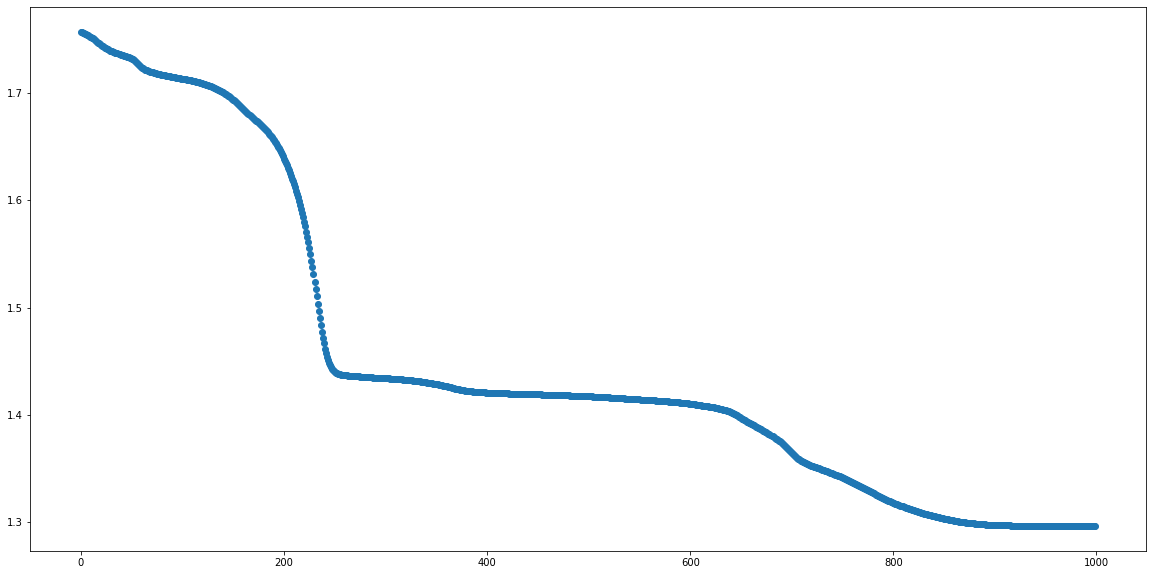

In [13]:
ex = [x for x in range(1000)] #Se crea una lista con números para cada iteración

#Se plotea
plt.figure(figsize=(20, 10))
plt.scatter(ex, iterrrr)
plt.show()

2 1 1 -5 -2


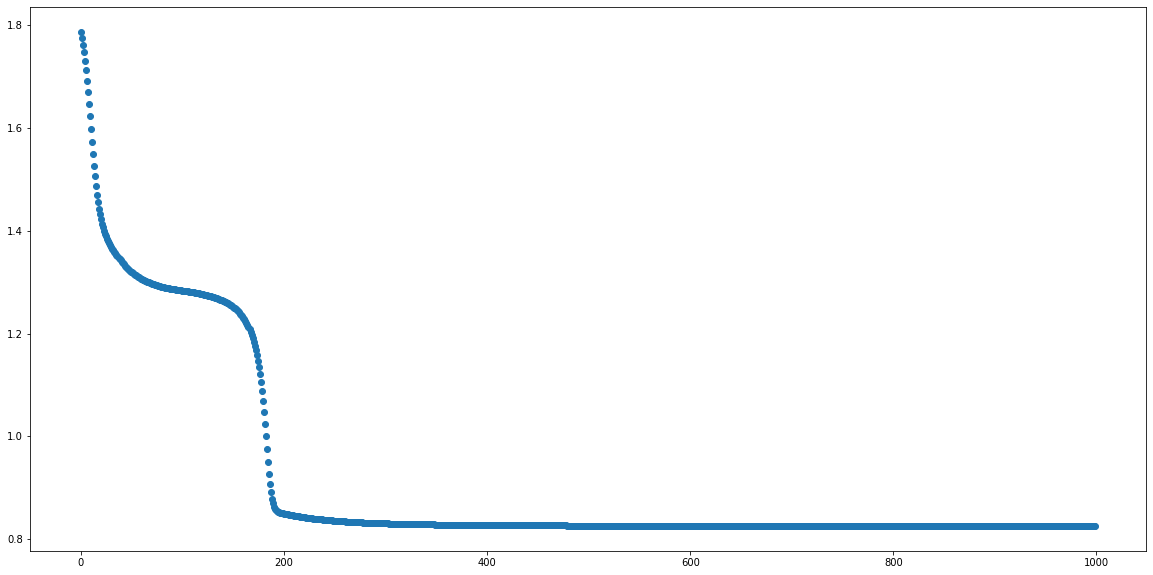

In [14]:
#Adicionalmente, esta celda sirve para obtener valores random entre el intervalo [-5,5] y se grafica. 
#Los pesos iniciales seguirán siendo los indicados anteriormente
from random import choice as ch

iterrrr = list()
l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

a_i,b_i,c_i,d_i,e_i = ch(l),ch(l),ch(l),ch(l),ch(l)

iterador(a_i,b_i,c_i,d_i,e_i)

ex = [x for x in range(1000)]

print(f'{a_i} {b_i} {c_i} {d_i} {e_i}') #Se muestran los pesos aleatoriamente escogidos

plt.figure(figsize=(20, 10))
plt.scatter(ex, iterrrr)
plt.show()

# E)

In [15]:
#Mostramos los valores obtenidos para los pesos y sesgos en la iteración 1000
print("Los valores de la iteración 1000: ", lista_1000, "\n")

#calculamos el error de los valores de la iteración 1000
j_1000 = J(lista_1000[0], lista_1000[1], lista_1000[2], lista_1000[3], lista_1000[4])

print("Los valores de J en la iteración 1000: ", j_1000, "\n")

Los valores de la iteración 1000:  [-1.940112315296186, 2.0816973823582514, 3.060583315787293, 4.944215354743408, 2.2206470004309913] 

Los valores de J en la iteración 1000:  1.296408450246726 

